<h2>Consumer Churn Analysis and Prediction</h2>

In [1]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [2]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
# Checking for any null entries in the dataframe
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [6]:
# Searching for binary columns in the dataset. Binary columns have only 2 values. So analysing them for predicting the churn rate will be easy

binary_cols = []

for col in df.columns:
    val = df[col].nunique(dropna=True)
    if val == 2:
        binary_cols.append(col)

binary_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

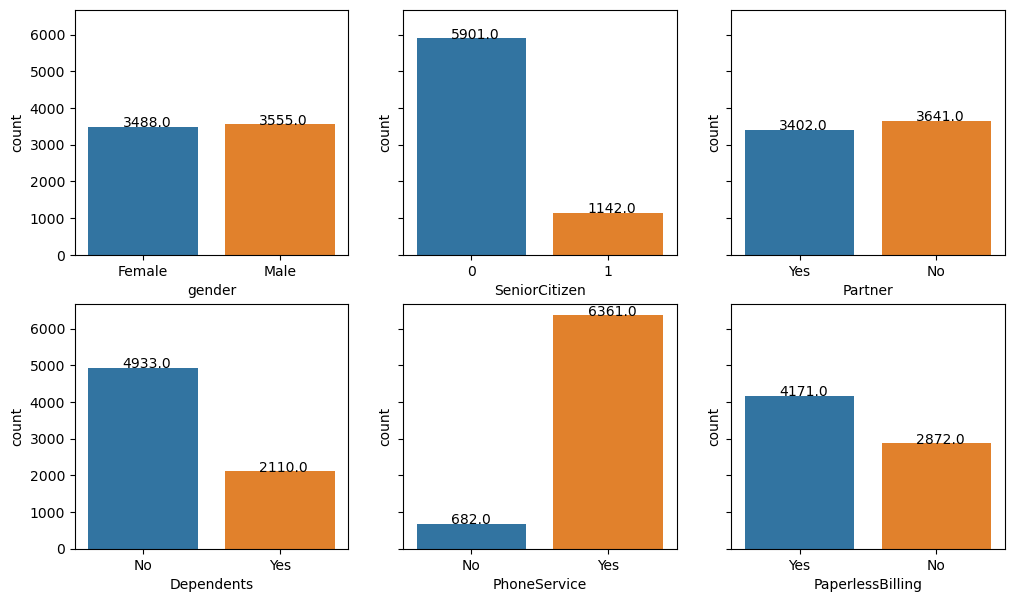

In [7]:
# Plotting the binary column data values to get a rough idea of their distribution

fig, axes = plt.subplots(2, 3, figsize=(12,7), sharey=True)

ax1 = sns.countplot(x="gender", data=df, ax=axes[0,0])
ax2 = sns.countplot(x="SeniorCitizen", data=df, ax=axes[0,1])
ax3 = sns.countplot(x="Partner", data=df, ax=axes[0,2])
ax4 = sns.countplot(x="Dependents", data=df, ax=axes[1,0])
ax5 = sns.countplot(x="PhoneService", data=df, ax=axes[1,1])
ax6 = sns.countplot(x="PaperlessBilling", data=df, ax=axes[1,2])

for p in ax1.patches:
   ax1.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
for p in ax2.patches:
   ax2.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
for p in ax3.patches:
   ax3.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
for p in ax4.patches:
   ax4.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
for p in ax5.patches:
   ax5.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
for p in ax6.patches:
   ax6.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

Some observations from the above plots:
1. There is roughly same distribution of male and female in the dataset.
2. Most of the target audience is young
3. The distribution is roughly same for people with or without partners
4. Most of the people in the dataset do not have any dependents
5. Most of the people opt for Phone Service and Paperless Billing

In [8]:
# Dividing the dataset according to the churn value

churn_df = df[df["Churn"]=="Yes"]
notChurn_df = df[df["Churn"]=="No"]

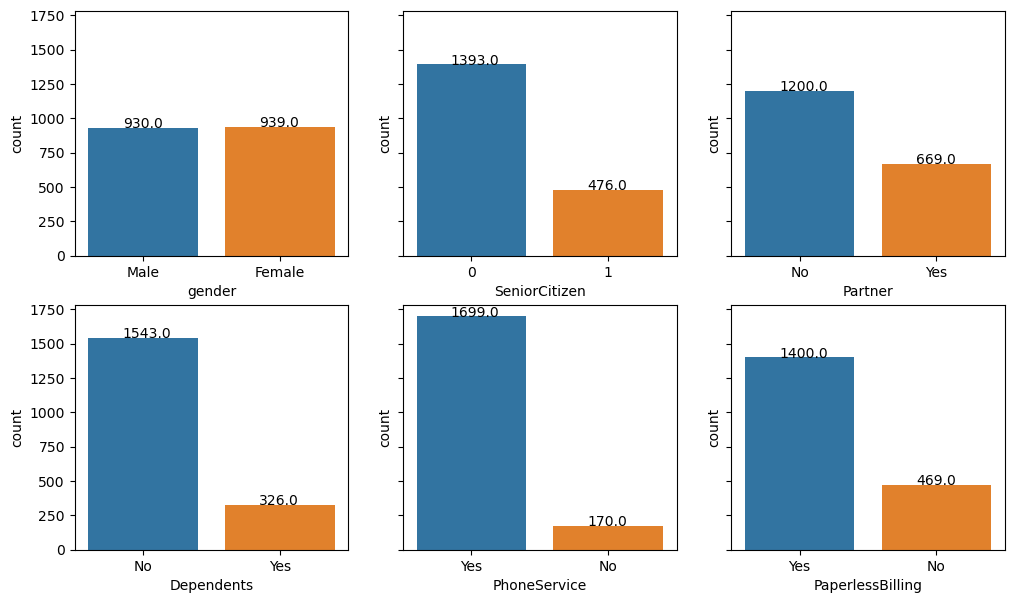

In [9]:
# Doing the same analysis for the "churn" dataset

fig, axes = plt.subplots(2, 3, figsize=(12,7), sharey=True)

ax1 = sns.countplot(x="gender", data=churn_df, ax=axes[0,0])
ax2 = sns.countplot(x="SeniorCitizen", data=churn_df, ax=axes[0,1])
ax3 = sns.countplot(x="Partner", data=churn_df, ax=axes[0,2])
ax4 = sns.countplot(x="Dependents", data=churn_df, ax=axes[1,0])
ax5 = sns.countplot(x="PhoneService", data=churn_df, ax=axes[1,1])
ax6 = sns.countplot(x="PaperlessBilling", data=churn_df, ax=axes[1,2])

for p in ax1.patches:
   ax1.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
for p in ax2.patches:
   ax2.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
for p in ax3.patches:
   ax3.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
for p in ax4.patches:
   ax4.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
for p in ax5.patches:
   ax5.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
for p in ax6.patches:
   ax6.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

Some observations made on the above graphs:
1. Gender does not tell us anything about churning because the distribution is almost same for both male and female
2. Most of the people who have churned have the following charateristics: they are not senior citizen, they are without any partner, dependents, and they opt for phone service as well as paperless billing

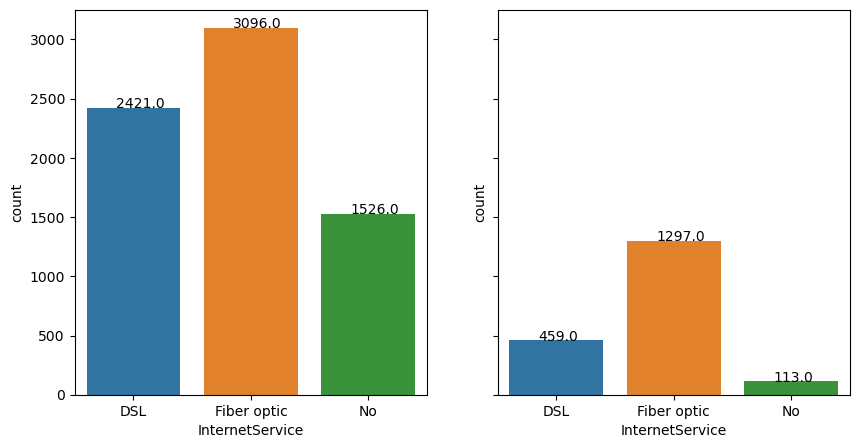

In [10]:
# Analysing the Internet Service distribution

fig2, axes2 = plt.subplots(1,2, figsize=(10,5), sharey=True)

ax7 = sns.countplot(x="InternetService", data=df, ax=axes2[0])
ax8 = sns.countplot(x="InternetService", data=churn_df, ax=axes2[1])

for p in ax7.patches:
   ax7.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
for p in ax8.patches:
   ax8.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))


In [11]:
FO_churn_pc = (1297/3096)*100
DSL_churn_pc = (459/2421)*100

print(FO_churn_pc)
print(DSL_churn_pc)

41.89276485788114
18.95910780669145


We can see that percentage of people who have churned is greater in case of ones with Fiber Optic Internet Service. Thus, it can be inferred from the above graphs that Fiber optic internet service does not suit and hence causes people to churn out of telecom service


In [12]:
df_dummy = df.copy()

df_dummy = df_dummy.drop(columns=['tenure', 'MonthlyCharges', 'TotalCharges', 'customerID'], axis=1)

df_dummy = df_dummy.drop(columns=binary_cols, axis=1)

churn_df_dummy = churn_df.copy()

churn_df_dummy = churn_df_dummy.drop(columns=['tenure', 'MonthlyCharges', 'TotalCharges', 'customerID'], axis=1)

churn_df_dummy = churn_df_dummy.drop(columns=binary_cols, axis=1)

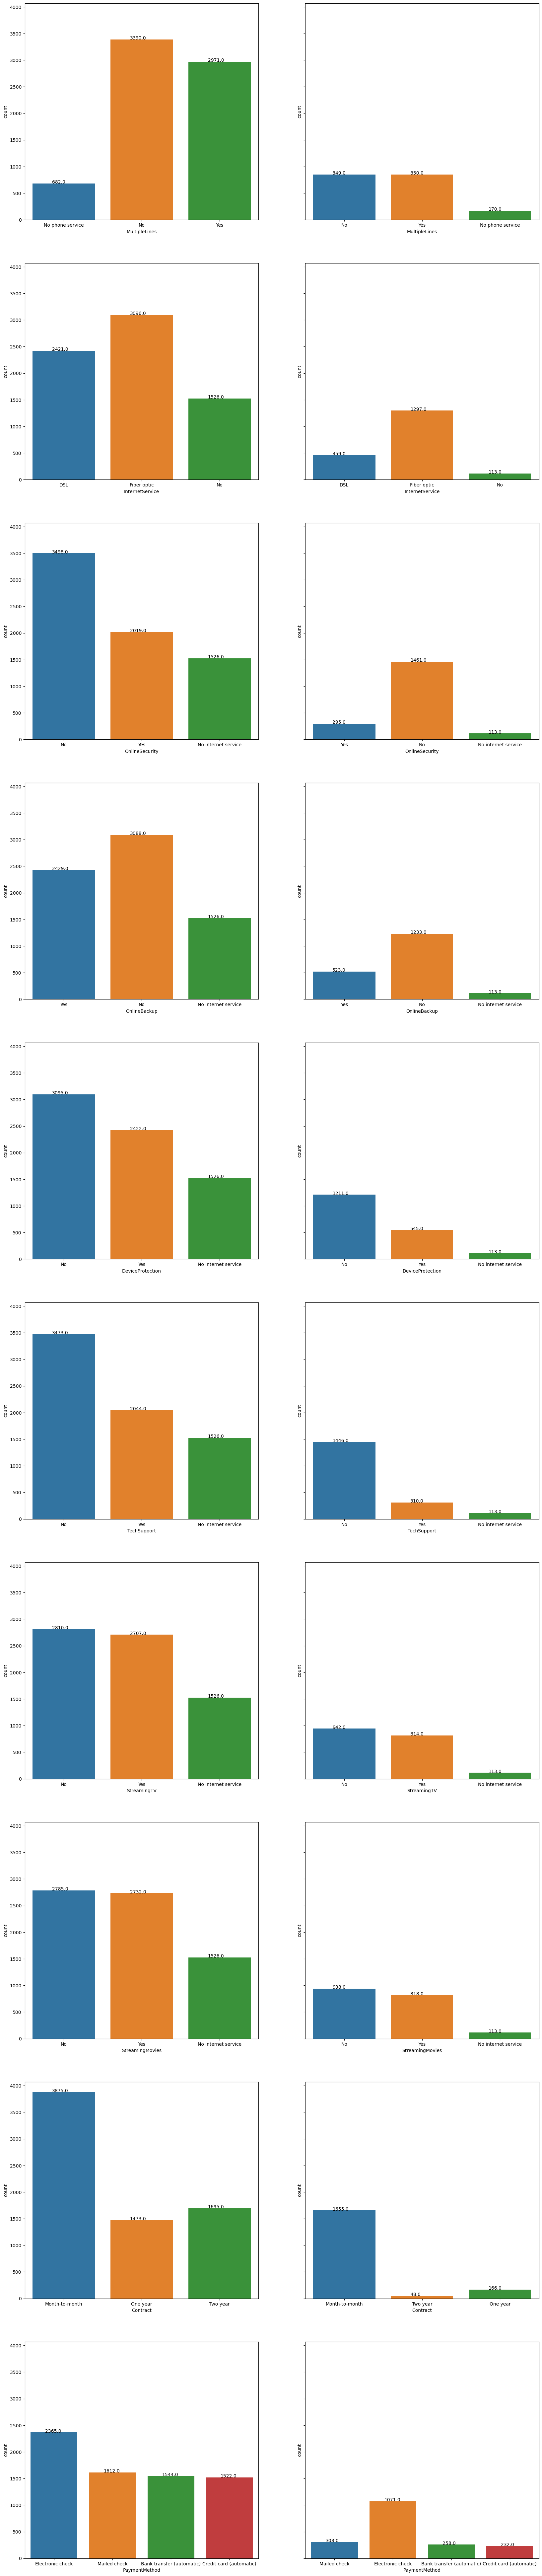

In [13]:
# Analysing the distribution for non-binary discrete columns

fig3, axes4 = plt.subplots(10, 2, figsize=(20,100), sharey=True)
i=0

for col in df_dummy.columns:
    ax9=sns.countplot(x=col, data=df_dummy, ax=axes4[i,0])
    ax10=sns.countplot(x=col, data=churn_df_dummy, ax=axes4[i,1])
    
    for p in ax9.patches:
       ax9.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
    for p in ax10.patches:
       ax10.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

    i+=1

In [14]:
# Encoding the string values of columns to integers

contract_numeric = {'Two year': 2, 'One year': 1, 'Month-to-month': 0}

df_dummy['Contract'] = df_dummy['Contract'].replace(contract_numeric)
churn_df_dummy['Contract'] = churn_df_dummy['Contract'].replace(contract_numeric)

In [15]:
churn_df_dummy['Contract'].mean()

0.14018191546281433

As the mean calculated above is very close to zero, we can say that short-term contract users churn out more often than long term contract users

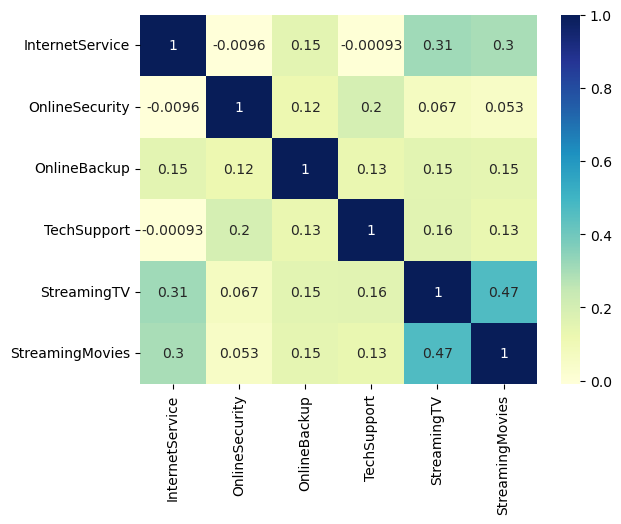

In [16]:
churn_df2 = churn_df[['InternetService','OnlineSecurity','OnlineBackup', 'TechSupport', 'StreamingTV', 'StreamingMovies']]

Bin2numeric = {'Yes':1, 'No':0}
service_numeric = {'Fiber optic': 2, 'DSL': 1, 'No': 0}
yes_no_numeric = {'Yes':2, 'No':1, 'No internet service':0}

# churn_df2['Contract']=churn_df2['Contract'].replace(contract_numeric)

churn_df2 = churn_df2.replace(service_numeric)
churn_df2 = churn_df2.replace(yes_no_numeric)

# churn_df2

internetServicesCorr = sns.heatmap(churn_df2.corr(), cmap="YlGnBu", annot=True)



Some insights from the above heatmap:
1. InternetService shows negative correlation with Online Security
2. InternetService shows somewhat reasonable correlation with StreamingTV and StreamingMovies
3. StreamingTV and StreamingMovies shows higher correlation with each other, meaning they can directly affect each other

In [2]:
# One-hot encoding the binary values

Bin2numeric={'Yes':1, 'No':0}
churn_df['Churn']=churn_df['Churn'].replace(Bin2numeric)
df['Churn']=df['Churn'].replace(Bin2numeric)

NameError: name 'churn_df' is not defined

In [19]:
Payment_numeric = {'Electronic check':3, 'Mailed check':2, 'Credit card (automatic)':1, 'Bank transfer (automatic)':0}

churn_df = churn_df.replace(Payment_numeric)

df[["PaymentMethod","Churn"]].groupby("PaymentMethod").mean()

,Churn
PaymentMethod,
Bank transfer (automatic),0.167098
Credit card (automatic),0.152431
Electronic check,0.452854
Mailed check,0.191067


From the above table, we can see that the mean is highest for electronic check mode of payment, whereas the mean is almost same for all other modes of payment. Thus, mode of payment may have some relation with people churning out of the service.

<AxesSubplot:ylabel='Density'>

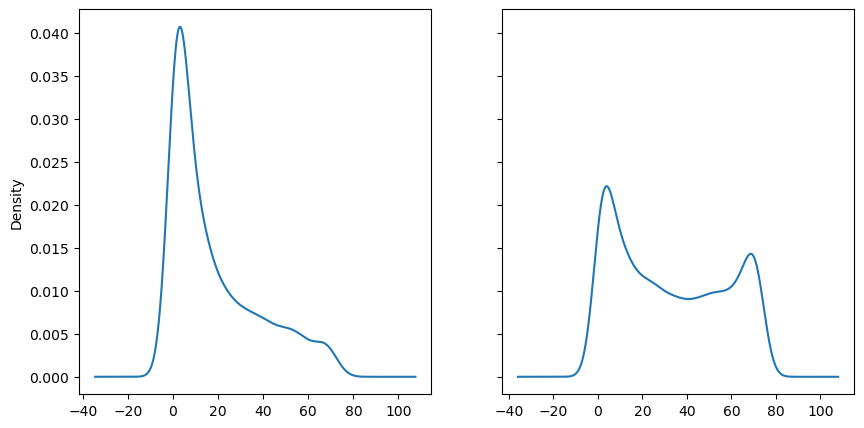

In [20]:
# Analysing the continuous variables

fig, axes = plt.subplots(1, 2, figsize=(10,5), sharey=True)
churn_df['tenure'].plot.kde(ax=axes[0])
df['tenure'].plot.kde(ax=axes[1])

From the above kde plots, we can infer that most of the people who have churned had a very less tenure with the company. People who have stayed long with the company are very less likely to churn. Thus, we can say that the probability of people churning is very likey if the tenure is below a certain threshold. Now, we need to find that threshold.

In [ ]:
print(churn_df['tenure'].unique())

<AxesSubplot:xlabel='tenure', ylabel='count'>

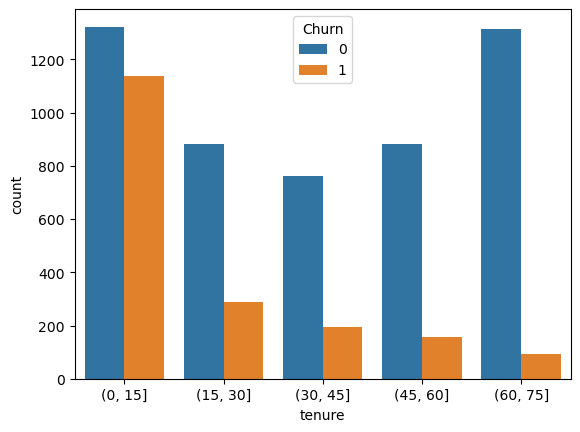

In [21]:
bins = pd.cut(df['tenure'], bins=[0,15,30,45,60,75])

sns.countplot(x=bins, data=df, hue='Churn')

From the above countplot, we can say that people whose tenure is less than 15 months are more likely to churn.

C:\Users\OJAS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\OJAS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

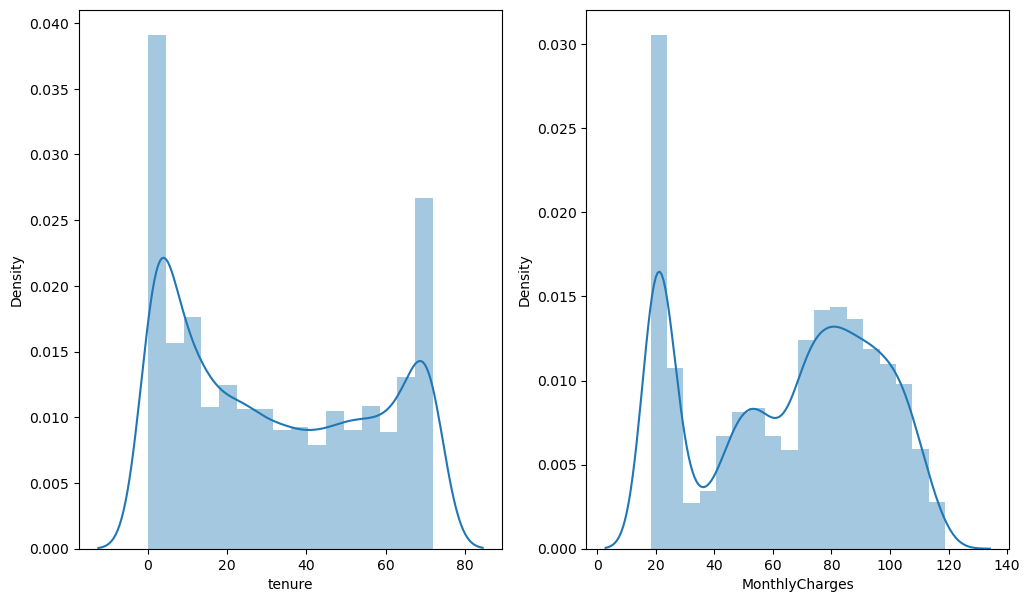

In [22]:
# Analysing the distribution of tenure and monthly charges

fig, axes = plt.subplots(1,2, figsize=(12, 7))
sns.distplot(df["tenure"], ax=axes[0])
sns.distplot(df["MonthlyCharges"], ax=axes[1])

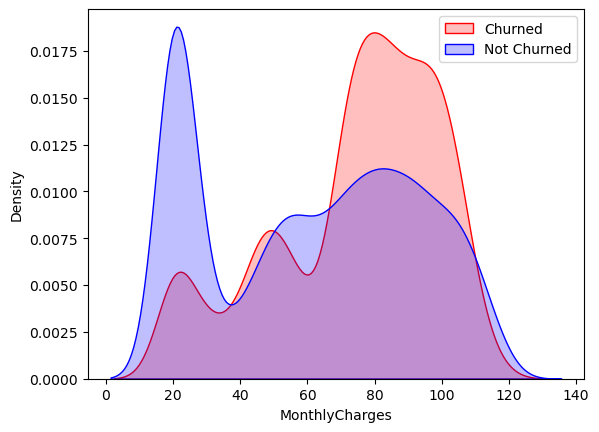

In [23]:
MonthlyCharges_churned = sns.kdeplot(data=churn_df['MonthlyCharges'], color='Red', shade='True')
MonthlyCharges_notchurned = sns.kdeplot(data=notChurn_df['MonthlyCharges'], color='Blue', shade='True')
plt.legend(['Churned', 'Not Churned'])

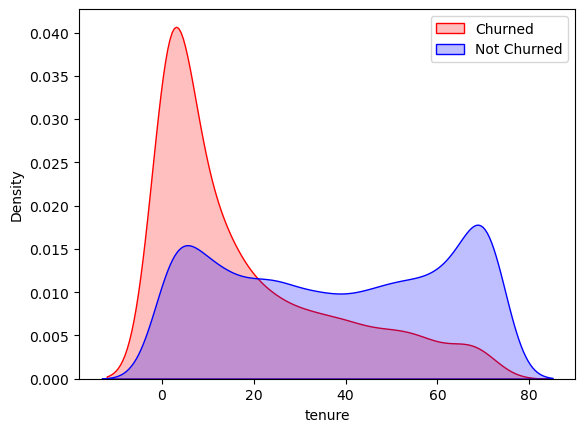

In [24]:
tenure_churned = sns.kdeplot(data=churn_df['tenure'], color='Red', shade='True')
tenure_notchurned = sns.kdeplot(data=notChurn_df['tenure'], color='Blue', shade='True')
plt.legend(['Churned', 'Not Churned'])

From the above two kde plots, we can say that tenure is inversely propertional to Monthly charges, which is directly proportional to Total Charges.


<h2>Building model</h2>

In [26]:
# Importing necessary libraries for machine learning

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.combine import SMOTEENN

In [27]:
# One-hot encoding

df = df.replace(Bin2numeric)
df = df.replace(Payment_numeric)
df = df.replace(service_numeric)
df = df.replace(contract_numeric)
df = df.replace('No phone service', 2)
df = df.replace('No internet service', 2)
df.drop(columns=['customerID','gender','PhoneService','TotalCharges'], axis=1, inplace=True)

In [28]:
df_new = df.copy()

y = df_new['Churn']
x = df_new.drop(columns='Churn', axis=1)

In [29]:
x

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0,1,0,1,2,1,0,1,0,0,0,0,0,1,3,29.85
1,0,0,0,34,0,1,1,0,1,0,0,0,1,0,2,56.95
2,0,0,0,2,0,1,1,1,0,0,0,0,0,1,2,53.85
3,0,0,0,45,2,1,1,0,1,1,0,0,1,0,0,42.30
4,0,0,0,2,0,2,0,0,0,0,0,0,0,1,3,70.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,1,0,1,1,1,1,1,1,2,84.80
7039,0,1,1,72,1,2,0,1,1,0,1,1,1,1,1,103.20
7040,0,1,1,11,2,1,1,0,0,0,0,0,0,1,3,29.60
7041,1,1,0,4,1,2,0,0,0,0,0,0,0,1,2,74.40


In [30]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [31]:
# target variables with imbalanced class distribution is not desired for machine learning models so we will perform upsampling of the data 

smote = SMOTEENN()
x_resampled, y_resampled = smote.fit_resample(x,y)

In [32]:
# Splitting the dataset into training and test datasets

(x_train, x_test, y_train, y_test) = train_test_split(x_resampled,y_resampled,test_size=0.2)

We will try different classifiers and tell which one is the best based on the accuracy score

<h4>Ridge Classifier</h4>

In [34]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score

ridge_clf = RidgeClassifier()
ridge_clf.fit(x_train, y_train)

RidgeClassifier()

In [35]:
pred = ridge_clf.predict(x_train)
accuracy_score(y_train,pred)

0.8884587020648967

In [36]:
pred = ridge_clf.predict(x_test)
accuracy_score(y_test,pred)

0.8827433628318584

<h4>Decision Tree Classifier</h4>

In [37]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [38]:
pred2 = dt_clf.predict(x_train)
accuracy_score(y_train,pred2)

1.0

In [39]:
pred2 = dt_clf.predict(x_test)
accuracy_score(y_test,pred2)

0.9284660766961652

<h4>Random Forest Classifier</h4>

In [40]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [41]:
pred3 = rf_clf.predict(x_train)
accuracy_score(y_train,pred3)

1.0

In [42]:
pred3 = rf_clf.predict(x_test)
accuracy_score(y_test,pred3)

0.9454277286135693

<h4>Support Vector Machine</h4>

In [43]:
from sklearn import svm

svm_clf = svm.SVC(kernel='rbf', gamma='auto')
svm_clf.fit(x_train,y_train)

SVC(gamma='auto')

In [44]:
pred4 = svm_clf.predict(x_train)
accuracy_score(y_train,pred4)

0.9799041297935103

In [45]:
pred4 = rf_clf.predict(x_test)
accuracy_score(y_test,pred4)

0.9454277286135693

The highest accuracy we obtained was *94.54*% by Support Vector Machine

Thus SVMs are the best classifier for this datset